https://datascience.stackexchange.com/questions/48390/how-do-i-build-an-image-dataset-for-cnn
https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
https://stackoverflow.com/questions/45969390/difference-between-stratifiedkfold-and-stratifiedshufflesplit-in-sklearn
https://www.tensorflow.org/tutorials/images/classification

In [ ]:
!pip install tensorflow==2.2

     |████████████████████████████████| 516.2 MB 4.0 kB/s 
     |████████████████████████████████| 3.0 MB 52.9 MB/s 
     |████████████████████████████████| 2.9 MB 60.3 MB/s 
     |████████████████████████████████| 454 kB 53.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalli

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Periksa versi library TensorFlow & Keras
print("Versi TensorFlow :", tf.__version__)
print("Versi Keras      :", keras.__version__)

Versi TensorFlow : 2.2.0
Versi Keras      : 2.3.0-tf


In [ ]:
import os
import cv2
import random
import numpy as np


img_size_100p = 128 #  dataset size jadi 100p bebas sih bisa 224 juga (untuk dipakai di Arsitektur VGG16) kalau pake 224 bakal makan memory banyak

path_train  = '/content/drive/MyDrive/Dataset Aksara Lampung/train'                           
path_test   = '/content/drive/MyDrive/Dataset Aksara Lampung/validation'                                                        
categories  = ['Ka', 'Ga', 'Nga', 'Pa', 'Ba', 'Ma', 'Ta', 'Da', 'Na', 'Ca', 'Ja', 'Nya','Ya', 'A', 'La', 'Ra', 'Sa', 'Wa', 'Ha', 'Gha']         

def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category) # Ambil label sebagai index (number)
        for img in os.listdir(path):
            img_array   = cv2.imread(os.path.join(path, img)) 
            img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resize  = cv2.resize(img_convert, (img_size_100p, img_size_100p))
            imageData.append([img_resize, class_num])
    
    return imageData

dataTrain   = create_data_img(path_train)
dataTest    = create_data_img(path_test)

# Shuffle Data Train (kalo enggak di shuffle, nanti data train ngurut berdasarkan labels, jadinya A Ba Ca gitu gitu)
random.seed(10) # 10 sebagai index shuffle, agar saat run ulang nanti hasil shuffle sama
random.shuffle(dataTrain)

In [ ]:
# X untuk Features & y untuk labels
X_train, y_train, X_test, y_test = [], [], [], []

for features, label in dataTrain:
    X_train.append(features)
    y_train.append(label)

for features, label in dataTest:
    X_test.append(features)
    y_test.append(label)

#-1 di reshape hm... pokoknya biar numpy nya nentuin dimensi datanya deh yang sesuai
X_train = np.array(X_train).reshape(-1, img_size_100p, img_size_100p, 3)
y_train = np.asarray(y_train)
X_test  = np.array(X_test).reshape(-1, img_size_100p, img_size_100p, 3)
y_test  = np.asarray(y_test)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)


X_train : (6975, 128, 128, 3)
y_train : (6975,)
X_test  : (1172, 128, 128, 3)
y_test  : (1172,)


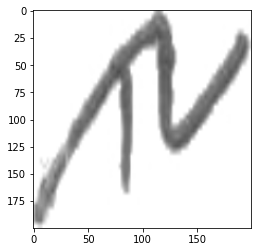

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[900])

In [ ]:
print("Isi Array X_train :\n\n", X_train[0]) # cuma buat ngabil dta contoh yg pertama ya ges yaaaa
print("\nIsi Array X_test  :\n\n", X_test[0])

def prep_pixels(train, test):
    # pokoknya ubah iteger ke float
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # ini buat jadiin range nya 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

X_train_norm, X_test_norm = prep_pixels(X_train, X_test)

print("\nIsi Array X_train_norm :\n\n", X_train_norm[0])
print("\nIsi Array X_test_norm  :\n\n", X_test_norm[0])

Isi Array X_train :

 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [250 250 250]
  [243 243 243]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]

Isi Array X_test  :

 [[[  5   5   5]
  [  6   6   6]
  [ 10  10  10]
  ...
  [127 127 127]
  [106 106 106]
  [130 130 130]]

 [[248 248 248]
  [245 245 245]
  [249 249 249]
  ...
  [250 250 250]
  [247 247 247]
  [225 225 225]]

 [[250 250 250]
  [254 254 254]
  [254 254 254]
  ...
  [250 250 250]
  [250 250 250]
  [231 231 231]]

 ...

 [[254 

In [ ]:
from tensorflow.keras.utils import to_categorical

print("Isi Array y_train :", y_train)
print("Isi Array y_test  :", y_test)

# one hot encode target values
y_train_encode = to_categorical(y_train)
y_test_encode  = to_categorical(y_test)

print("\nIsi Array y_train_encode :\n\n", y_train_encode)
print("\nIsi Array y_test_encode :\n\n", y_test_encode)

Isi Array y_train : [ 8  7 11 ...  6  0  9]
Isi Array y_test  : [ 0  0  0 ... 19 19 19]

Isi Array y_train_encode :

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Isi Array y_test_encode :

 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
print("X_train_norm     :", X_train_norm.shape)
print("y_train_encode   :", y_train_encode.shape)
print("X_test_norm      :", X_test_norm.shape)
print("y_test_encode    :", y_test_encode.shape)

X_train_norm     : (6975, 128, 128, 3)
y_train_encode   : (6975, 20)
X_test_norm      : (1172, 128, 128, 3)
y_test_encode    : (1172, 20)


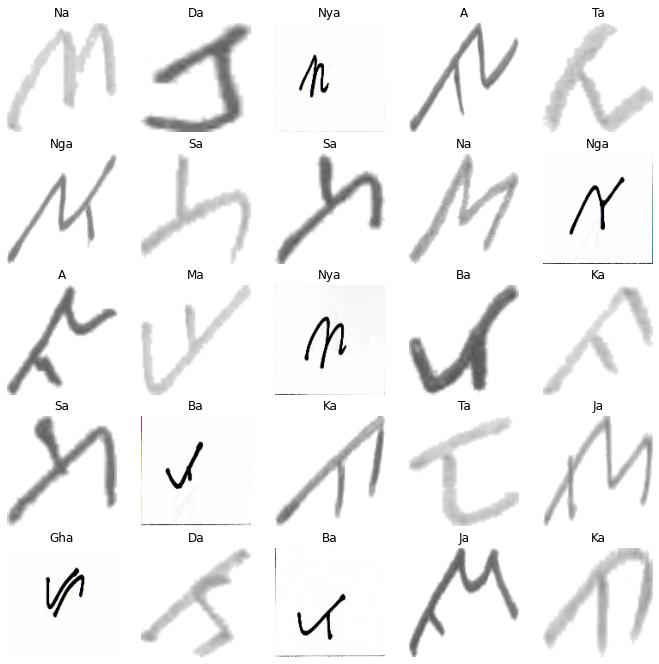

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 5     # ⚠️ SESUAIKAN ⚠️
ncols = 5     # ⚠️ SESUAIKAN ⚠️
hspace = 0
wspace = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))    
fig.subplots_adjust(hspace, wspace)

for i in range(nrows):
    for j in range(ncols):
        temp = i*ncols+j                # Index looping
        ax[i,j].imshow(X_train[temp])   # Show features/images
        if y_train[temp] == 0:          # ⚠️ SESUAIKAN ⚠️
            judul = "Ka"          # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 1:        # ⚠️ SESUAIKAN ⚠️
            judul = "Ga"        # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 2:        # ⚠️ SESUAIKAN ⚠️
            judul = "Nga"          # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 3:        # ⚠️ SESUAIKAN ⚠️
            judul = "Pa"     
        elif y_train[temp] == 4:        # ⚠️ SESUAIKAN ⚠️
            judul = "Ba"
        elif y_train[temp] == 5:        # ⚠️ SESUAIKAN ⚠️
            judul = "Ma"        # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 6:        # ⚠️ SESUAIKAN ⚠️
            judul = "Ta"          # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 7:        # ⚠️ SESUAIKAN ⚠️
            judul = "Da"      # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 8:        # ⚠️ SESUAIKAN ⚠️
            judul = "Na"
        elif y_train[temp] == 9:        # ⚠️ SESUAIKAN ⚠️
            judul = "Ca"        # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 10:        # ⚠️ SESUAIKAN ⚠️
            judul = "Ja"          # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 11:        # ⚠️ SESUAIKAN ⚠️
            judul = "Nya"      # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 12:        # ⚠️ SESUAIKAN ⚠️
            judul = "Ya"
        elif y_train[temp] == 13:        # ⚠️ SESUAIKAN ⚠️
            judul = "A"        # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 14:        # ⚠️ SESUAIKAN ⚠️
            judul = "La"          # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 15:        # ⚠️ SESUAIKAN ⚠️
            judul = "Ra"      # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 16:        # ⚠️ SESUAIKAN ⚠️
            judul = "Sa"
        elif y_train[temp] == 17:        # ⚠️ SESUAIKAN ⚠️
            judul = "wa"        # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 18:        # ⚠️ SESUAIKAN ⚠️
            judul = "Ha"          # ⚠️ SESUAIKAN ⚠️
        elif y_train[temp] == 19:        # ⚠️ SESUAIKAN ⚠️
            judul = "Gha"      # ⚠️ SESUAIKAN ⚠️
                 
        ax[i,j].set_title(judul)        # Show labels
        ax[i,j].axis('off')             # Hide axis
plt.show()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

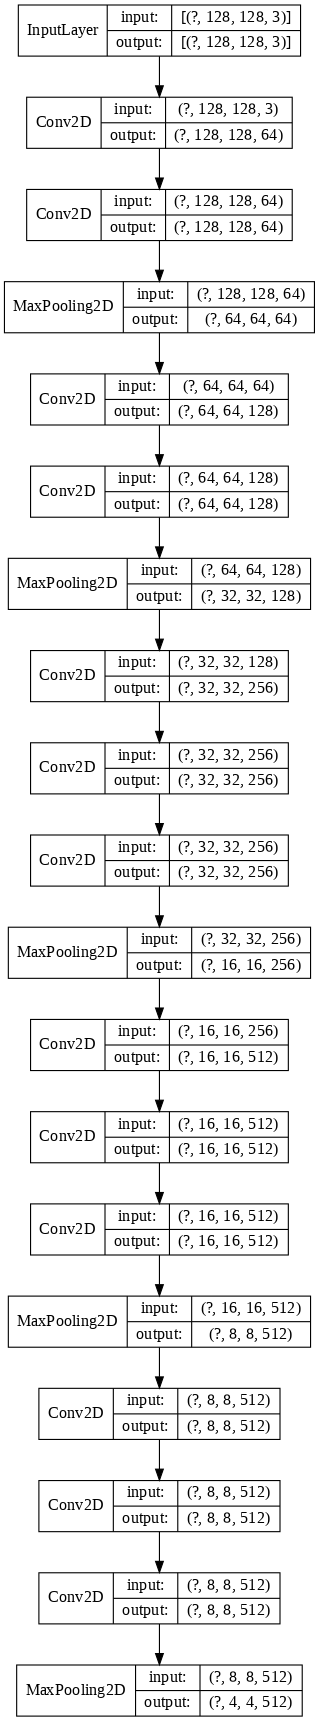

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import plot_model

'''
> weights='imagenet'            bobot diawal diisi langsung dengan bobotnya "pinter"nya imagenet (pre-trained) (kan udah dilatih),nahhh jumlah epoch nya bisa sedikit aja
> weights=None                  bobot diawal diisi dengan nilai secara acak (random), jika menggunakan ini perbanyak jumlah epoch
> include_top=False             tidak mengikutsertakan fully-connected layer (karena akan didefinisikan secara terpisah dan menyesuaikan
                                dengan dataset yang dipakai), dengan kata lain yang diambil hanya feature extractor layernya saja
> conv_base.trainable=False     hanya diaktifkan jika weights='imagenet', artinya bobot di feature extractor tidak akan diperbarui saat
                                training (freeze), dengan kata lain "proses belajar" hanya akan dilakukan di fully-connected layer yang
                                telah didefinisikan sebelumnya secara terpisah. (feature extractor hanya tinggal dipakai saja)
'''

conv_base = VGG16(weights='imagenet', 
include_top=False, 
input_shape=(img_size_100p, img_size_100p, 3))


conv_base.trainable = False                                                                                   
conv_base.summary()
plot_model(conv_base, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

In [ ]:
conv_base.output

<tf.Tensor 'block5_pool/Identity:0' shape=(None, 6, 6, 512) dtype=float32>

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                10260     
Total params: 14,724,948
Trainable params: 10,260
Non-trainable params: 14,714,688
_________________________________________________________________


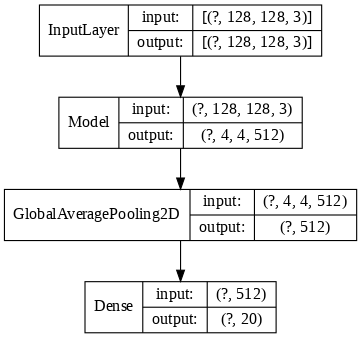

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

def define_model_vgg16():
    model = Sequential()
    
    model.add(conv_base)                        
    model.add(GlobalAveragePooling2D())

    #model.add(Dense(128, activation='relu')) 
    #model.add(Dropout(0.5, seed=10))            
    #model.add(Dense(64, activation='relu'))     
    #model.add(Dropout(0.5, seed=10)) 
    model.add(Dense(20, activation='softmax'))   
    
    # Compile Model
    opt = Adam(lr=0.0005)                      
    model.compile(optimizer=opt, 
    loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = define_model_vgg16()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

In [ ]:
os.mkdir("/content/simpan_model") # Buat folder untuk save model report (run 1x aja 2x nanti lu error nangessss awkwkwkwk)

In [ ]:
%%time

import pandas as pd

epochs = 25       
batch_size = 64   

model = define_model_vgg16() 


history = model.fit(X_train_norm, 
y_train_encode, epochs=epochs, 
batch_size=batch_size, verbose=1)

# sebener nya ada 2 cara yg di pake, cara 1 tuh kita split aeee data train nya kan tadi ada 6975 tuh, kita split 20% buat validasi, ehh malah berat makan ram banyak, apalagi gambar nya ada ribuan yakan
# jadi yaudah pake yg simple yg penting hasilnya bagus yagasihhh

#nah kalau cara 2 tuh kita gak usah pake data validasi, pake train aeee jadi yaudah train sama testing aja, tapi jgn salah tanpa validasi ttp bagus kok, coba ajaaa.

Epoch 1/25
109/109 [==============================] - 10s 91ms/step - loss: 2.8158 - accuracy: 0.1654
Epoch 2/25
109/109 [==============================] - 10s 91ms/step - loss: 2.5325 - accuracy: 0.3406
Epoch 3/25
109/109 [==============================] - 10s 91ms/step - loss: 2.3399 - accuracy: 0.4509
Epoch 4/25
109/109 [==============================] - 10s 93ms/step - loss: 2.1758 - accuracy: 0.5495
Epoch 5/25
109/109 [==============================] - 10s 92ms/step - loss: 2.0336 - accuracy: 0.6054
Epoch 6/25
109/109 [==============================] - 10s 92ms/step - loss: 1.9078 - accuracy: 0.6565
Epoch 7/25
109/109 [==============================] - 10s 93ms/step - loss: 1.7972 - accuracy: 0.6856
Epoch 8/25
109/109 [==============================] - 10s 93ms/step - loss: 1.6985 - accuracy: 0.7204
Epoch 9/25
109/109 [==============================] - 10s 93ms/step - loss: 1.6084 - accuracy: 0.7454
Epoch 10/25
109/109 [==============================] - 10s 93ms/step - loss: 1.527

In [ ]:
import matplotlib.pyplot as plt

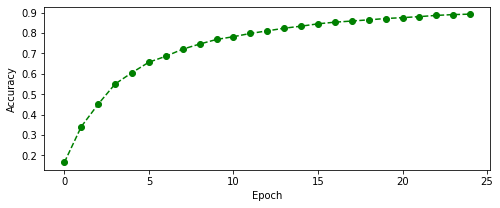

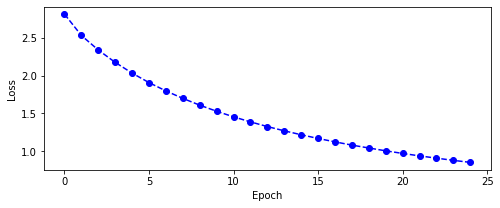

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['accuracy'], 'og', linestyle='dashed')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['loss'], 'ob', linestyle='dashed')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
plt.show()

In [ ]:
#Cara 1

history = model.fit(X_train_norm, y_train_encode, validation_split=0.2, epochs=25, batch_size=64, verbose=1)

KeyError: ignored

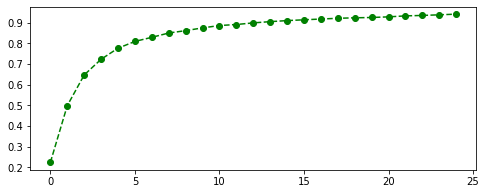

In [ ]:
#ini buat munculin grafik

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['accuracy'], 'og', linestyle='dashed')
ax.plot(history.history['val_accuracy'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['train', 'val'], loc='lower right')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['loss'], 'ob', linestyle='dashed')
ax.plot(history.history['val_loss'])
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
import pandas as pd

# 01 - Save model as h5
model.save("/content/simpan_model/model_vgg16.h5")

# 02 - Save model report to csv
model_csv = pd.DataFrame(history.history)
csv_file = "/content/simpan_model/model_vgg16.csv"
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)

In [ ]:
# Load model
from tensorflow.keras.models import load_model
# Masukin deh model lu di mane?
model = load_model('/content/simpan_model/model_vgg16.h5') 
#model.summary()

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# nah ini buat gua kalau mau munculin confusion matrix
encoder             = LabelBinarizer()
y_train_encode_new  = encoder.fit_transform(y_train)
y_test_encode_new   = encoder.fit_transform(y_test)

# ============================================================================ #
# =============================== DATA TESTING =============================== #
# ============================================================================ #

pred        = model.predict(X_test_norm.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1) 



#Kalau program lu pake nya Multi class alist softmax, lu pake fungsi ini * np.argmax(model.predict(x), axis=-1) 
#Nah Kalau model elu cuma ada 2 class boleh pake ini sob * (model.predict(x) > 0.5).astype("int32") 


pred_label  = model.predict_classes(X_test_norm, batch_size=64, verbose=0)  # label hasil prediksi
true_label  = np.argmax(y_test_encode_new, axis=-1)                         # label yang sebenarnya

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)

Label Prediksi   : [10  0  0 ... 19 19 19]
Label Sebenarya  : [ 0  0  0 ... 19 19 19] 

37/37 [==============================] - 2s 49ms/step - loss: 1.0952 - accuracy: 0.8618


Accuracy : 86.177%
Loss     : 1.095

Classification Report :

              precision    recall  f1-score   support

          Ka       0.84      0.79      0.81        61
          Ga       0.75      0.95      0.84        61
         Nga       0.87      0.74      0.80        61
          Pa       0.90      1.00      0.95        61
          Ba       0.92      0.98      0.95        61
          Ma       0.82      0.92      0.87        61
          Ta       0.97      0.83      0.89        69
          Da       0.97      0.95      0.96        61
          Na       0.71      0.98      0.82        61
          Ca       0.90      0.77      0.83        61
          Ja       0.63      0.85      0.72        61
         Nya       0.89      0.79      0.83        61
          Ya       0.98      0.92      0.95        61
           A       0.92      0.69      0.79        67
          La       0.90      0.93      0.92        61
          Ra       0.93      0.86      0.89        43
          Sa       

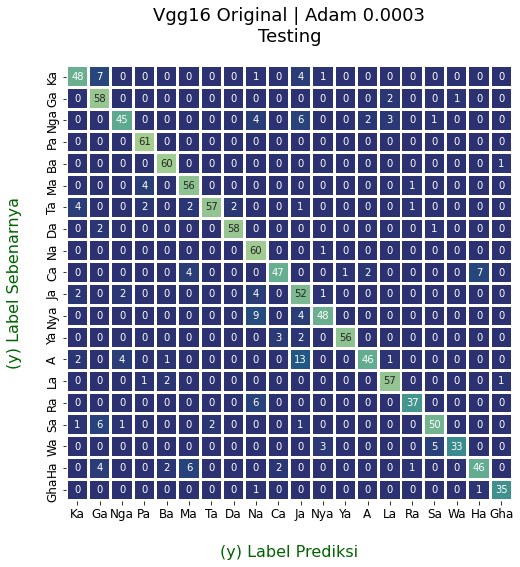

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['Ka', 'Ga', 'Nga', 'Pa', 'Ba', 'Ma', 'Ta', 'Da', 'Na', 'Ca', 'Ja', 'Nya','Ya', 'A', 'La', 'Ra', 'Sa', 'Wa', 'Ha', 'Gha'] 
cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, prediksi, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)

ax.set_title('Vgg16 Original | Adam 0.0003\nTesting', fontsize=18, pad=24)  
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Label Prediksi", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Label Sebenarnya", fontsize=16, color="darkgreen", labelpad=24)
plt.show()

In [ ]:
df = pd.DataFrame({'true_label': true_label, 'pred_label': pred_label})

In [ ]:
df.loc[df['true_label']==0].loc[df['pred_label']==0]

,true_label,pred_label
0,0,0
1,0,0
2,0,0
5,0,0
6,0,0
9,0,0
10,0,0
12,0,0
13,0,0
14,0,0


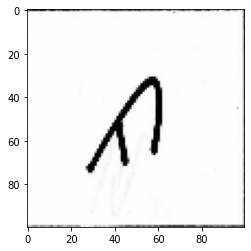

In [ ]:
plt.imshow(X_test_norm[0])

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# load and prepare the image
def load_image(filename):
    img = load_img(filename, target_size=(img_size_100p, img_size_100p))
    plt.imshow(img)
    plt.axis("off");
    img = img_to_array(img)
    img = img.reshape(-1, img_size_100p, img_size_100p, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example(new_data_path):
    # load the image
    img = load_image(new_data_path)
    # load model
    model = load_model('/content/simpan_model/model_vgg16.h5')    # ⚠️ SESUAIKAN ⚠️
    # predict the class
    result = model.predict_classes(img)               
    if result[0] == 0:                                
        print("\nHasil Prediksi: Ka")           
    elif result[0] == 1:                              
        print("\nHasil Prediksi: Ga")         
    elif result[0] == 2:                              
        print("\nHasil Prediksi: Nga")           
    elif result[0] == 3:                              
        print("\nHasil Prediksi: Pa")       
    elif result[0] == 4:                             
        print("\nHasil Prediksi: Ba")             
    elif result[0] == 5:                              
        print("\nHasil Prediksi: Ma")
    elif result[0] == 6:                             
        print("\nHasil Prediksi: Ta")
    elif result[0] == 7:                              
        print("\nHasil Prediksi: Da")
    elif result[0] == 8:                              
        print("\nHasil Prediksi: Na")
    elif result[0] == 9:                              
        print("\nHasil Prediksi: Ca")
    elif result[0] == 10:                             
        print("\nHasil Prediksi: Ja")
    elif result[0] == 11:                             
        print("\nHasil Prediksi: Nya") 
    elif result[0] == 12:                              
        print("\nHasil Prediksi: Ya")    
    elif result[0] == 13:                              
        print("\nHasil Prediksi: A")    
    elif result[0] == 14:                              
        print("\nHasil Prediksi: La")    
    elif result[0] == 15:                             
        print("\nHasil Prediksi: Ra")    
    elif result[0] == 16:                              
        print("\nHasil Prediksi: Sa")
    elif result[0] == 17:                              
        print("\nHasil Prediksi: Wa")
    elif result[0] == 18:                              
        print("\nHasil Prediksi: Ha")
    elif result[0] == 19:                              
        print("\nHasil Prediksi: Gha")   

In [ ]:
new_data_path = '/content/drive/MyDrive/Dataset Aksara Lampung/test/Ba/ba 002.jpeg'  
run_example(new_data_path)

In [ ]:
ypred = model.predict